# Morphological Operators using CV2 6_25_2020

In [11]:
'''
This is good for reducing noise on 'TEXT' data or dots( black dots on white like paper)

'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2

In [12]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [21]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax = ax.imshow(img, cmap = 'gray')


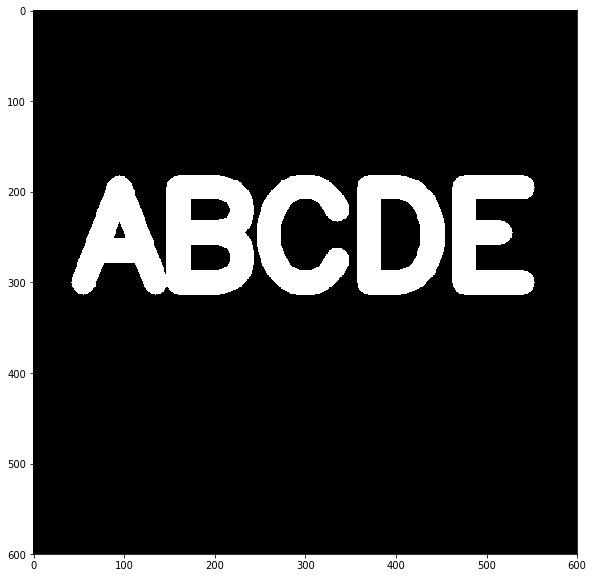

In [22]:
img = load_img()
display_img(img)

# Erosion takes away boundaries of the foregrand objects

In [23]:
kernel = np.ones((5,5), dtype = np.uint8)

In [24]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

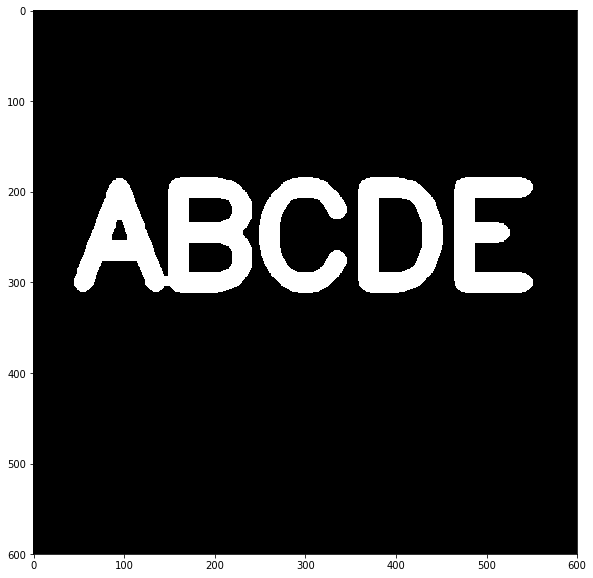

In [26]:
result = cv2.erode(img, kernel, iterations =1)
display_img(result)

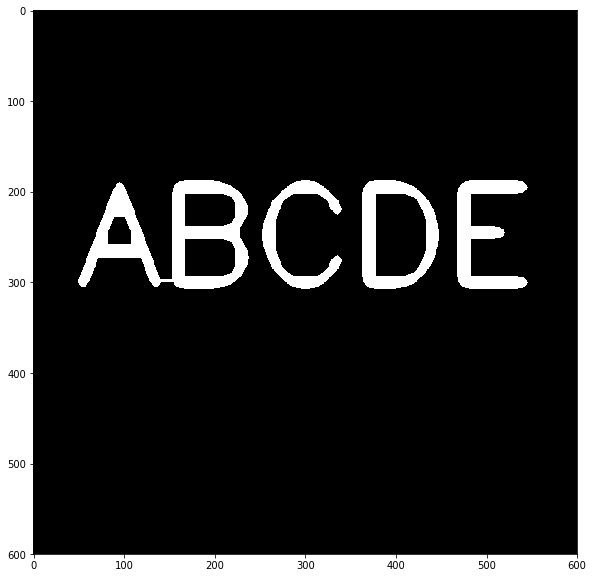

In [28]:
result = cv2.erode(img, kernel, iterations =3)
display_img(result)

In [29]:
# Opening is 1. Erosion followed by 2. Dilation
img = load_img()
white_noise = np.random.randint(low = 0, high = 2, size = (600,600))
white_noise    # array of 0 or 1s

array([[0, 1, 0, ..., 0, 1, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 0]])

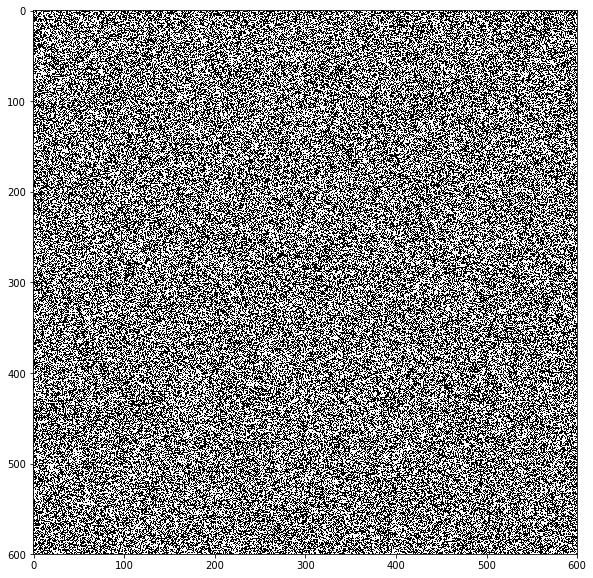

In [30]:
display_img(white_noise)

In [32]:
img.max()   # we need to convert this to 

255.0

In [33]:
white_noise = white_noise*255

In [34]:
white_noise

array([[  0, 255,   0, ...,   0, 255, 255],
       [  0, 255,   0, ...,   0,   0, 255],
       [  0,   0, 255, ...,   0,   0, 255],
       ...,
       [  0, 255, 255, ..., 255,   0, 255],
       [255,   0, 255, ...,   0, 255, 255],
       [255, 255,   0, ..., 255, 255,   0]])

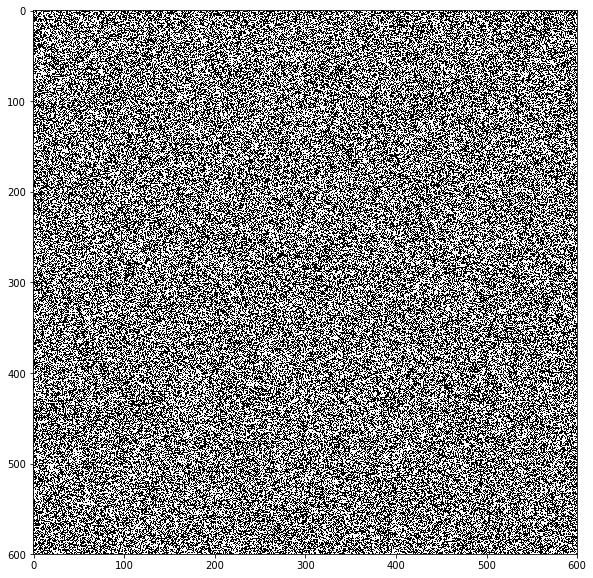

In [35]:
display_img(white_noise)

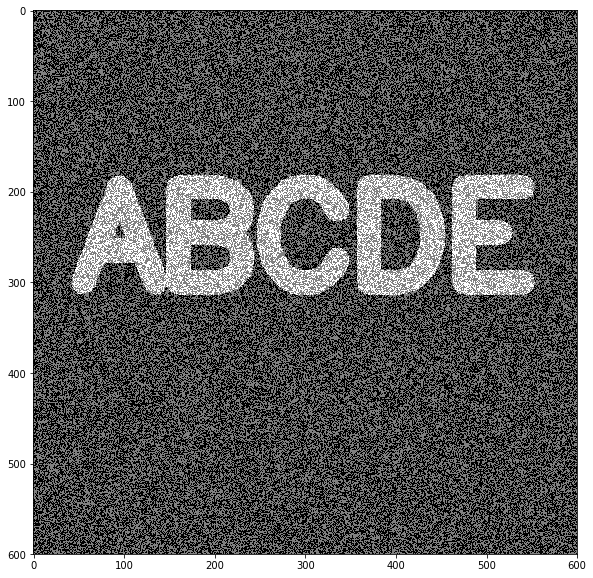

In [37]:
noise_image = white_noise + img
display_img(noise_image)    # This is the noisy image we want to work with as base

In [38]:
# cleaning up background noise using Opening => 1. Erosion followed by + 2. Dilation
opening = cv2.morphologyEx(noise_image,cv2.MORPH_OPEN, kernel)  # erosion + dialatin = opening

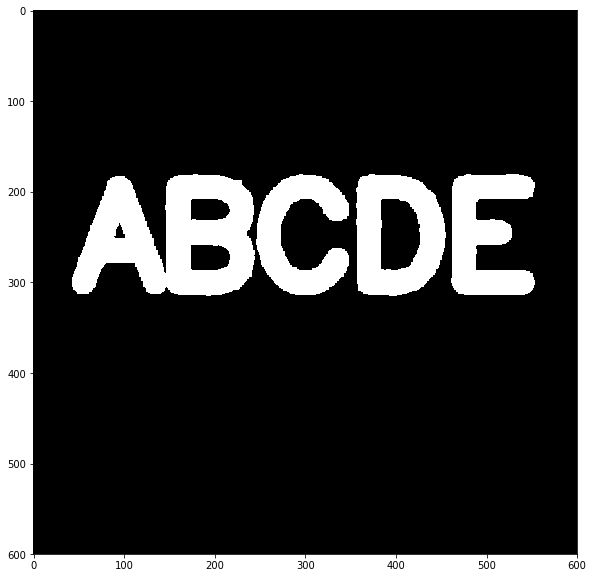

In [40]:
display_img(opening) # opening reduces noise level. 

In [41]:
# Now foreground noise: 
img = load_img()

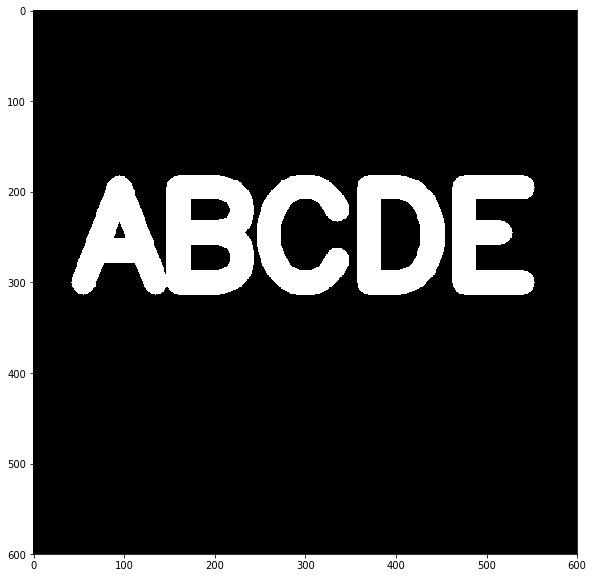

In [42]:
display_img(img)

In [43]:
black_noise = np.random.randint(low = 0, high = 2, size = (600,600))
black_noise = black_noise*-255    # background noise 
print(black_noise)

[[-255    0 -255 ...    0    0 -255]
 [-255    0 -255 ...    0    0    0]
 [   0    0 -255 ...    0 -255 -255]
 ...
 [-255    0 -255 ... -255    0    0]
 [   0 -255 -255 ... -255    0    0]
 [   0 -255 -255 ...    0    0 -255]]


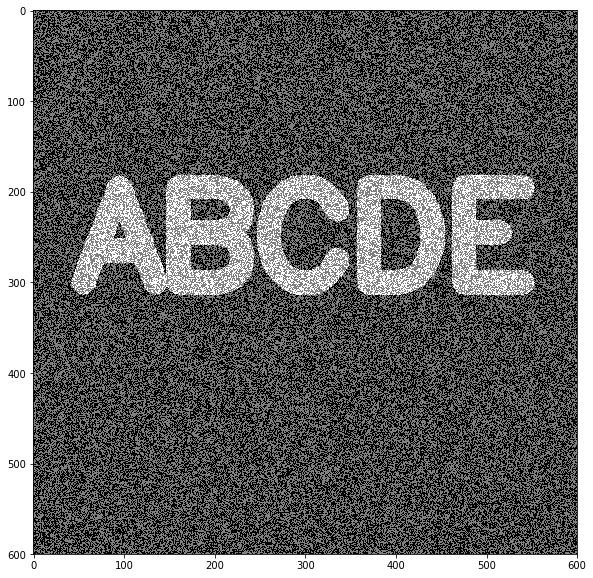

In [44]:
black_noise_img = img + black_noise 
display_img(black_noise_img)

In [46]:
black_noise_img[black_noise_img==-255]=0
black_noise_img.min()

0.0

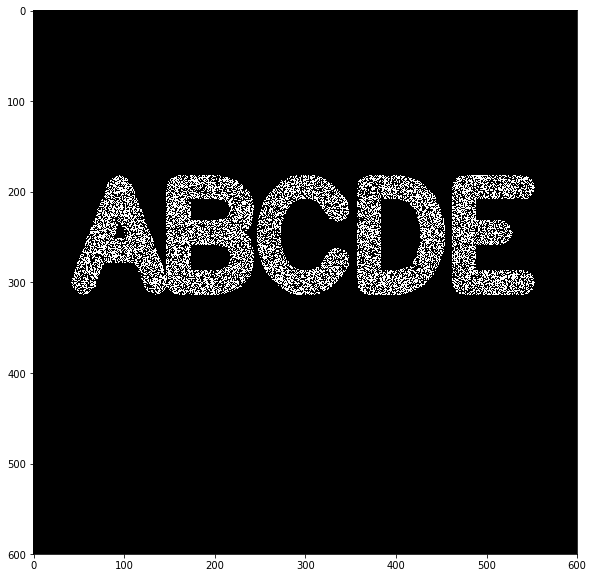

In [47]:
display_img(black_noise_img)   # now the noise is brought up from the background to the foreground
#we will now use closing to eliminate the noise in the foreground 

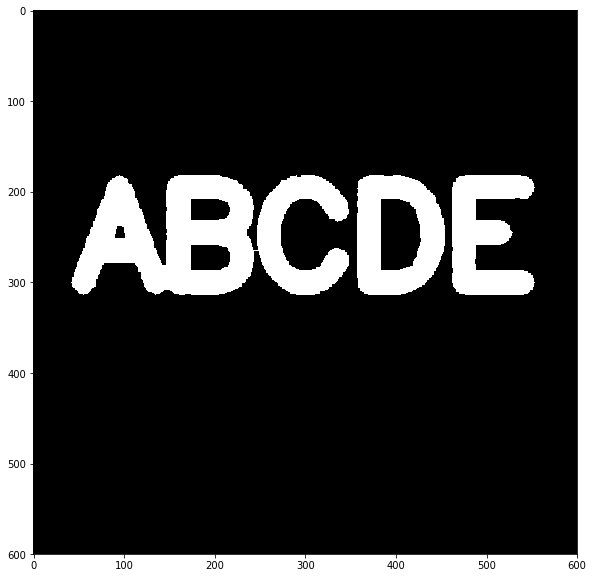

In [48]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

In [49]:
# Morphological Gradient  (takes between Dilution and Erosion)
img = load_img()

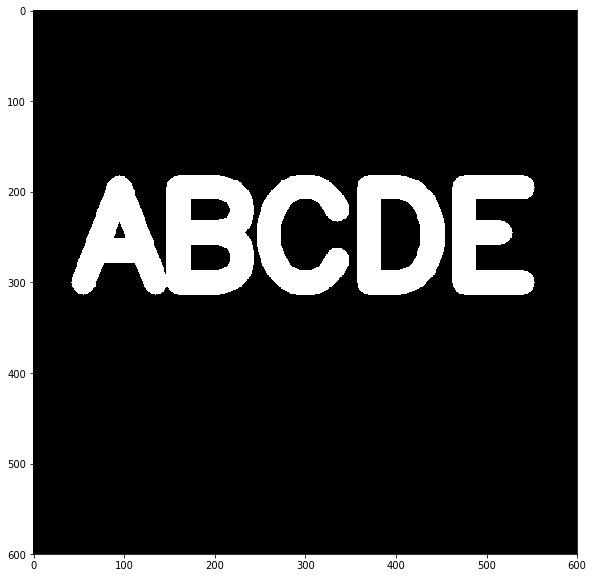

In [51]:
display_img(img)

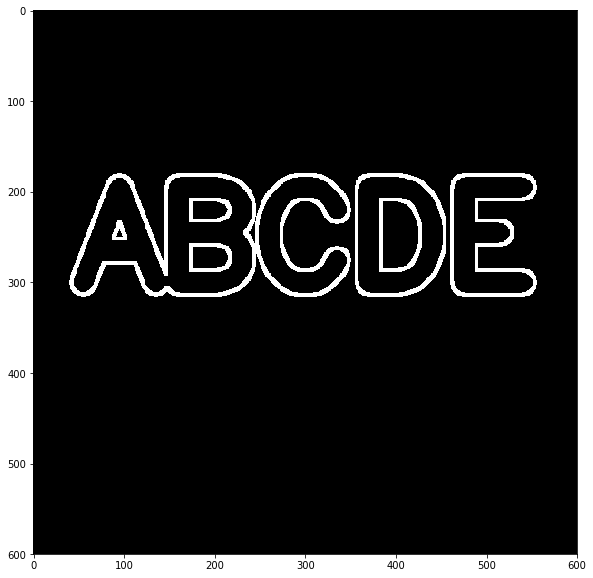

In [52]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)   # Gradient shows just the edges...Edge detection!!
display_img(gradient)